In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/camilousa/datasets/master/pm25.csv')

In [5]:
#Columna
type(df['year'])
#dataframe
type(df[['year','month']])
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
ts = df['TEMP']
#se corrige el indicep ara dar la serie de tiempo
ts.index = pd.to_datetime({"year": df["year"],"month": df["month"],"day": df["day"],"hour": df["hour"]})
ts

2010-01-01 00:00:00   -11.0
2010-01-01 01:00:00   -12.0
2010-01-01 02:00:00   -11.0
2010-01-01 03:00:00   -14.0
2010-01-01 04:00:00   -12.0
                       ... 
2014-12-31 19:00:00    -2.0
2014-12-31 20:00:00    -3.0
2014-12-31 21:00:00    -3.0
2014-12-31 22:00:00    -4.0
2014-12-31 23:00:00    -3.0
Name: TEMP, Length: 43824, dtype: float64

2010-01-01 00:00:00   -11.0
2010-01-01 01:00:00   -12.0
2010-01-01 02:00:00   -11.0
2010-01-01 03:00:00   -14.0
2010-01-01 04:00:00   -12.0
                       ... 
2010-01-31 19:00:00    -1.0
2010-01-31 20:00:00    -1.0
2010-01-31 21:00:00    -1.0
2010-01-31 22:00:00    -2.0
2010-01-31 23:00:00    -2.0
Name: TEMP, Length: 744, dtype: float64

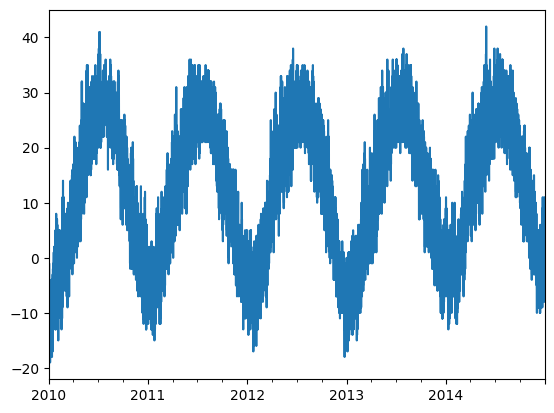

In [ ]:
ts.plot()
#Al tener fecha en el indice los datos se manipulan mas facil
# los : marcan un rango para definir
ts["2010-01-01 1:0:0":"2010-01-01 5:0:0"]
ts["2010-01-01":"2010-01-02"]
ts["2010-01"]

<Axes: >

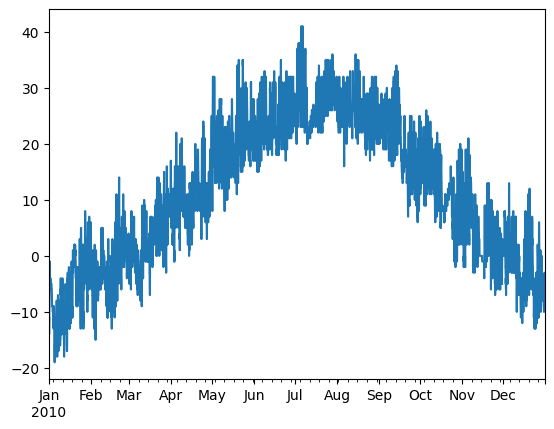

In [ ]:
dfI = ts["2010"]
dfI.plot()

<Axes: >

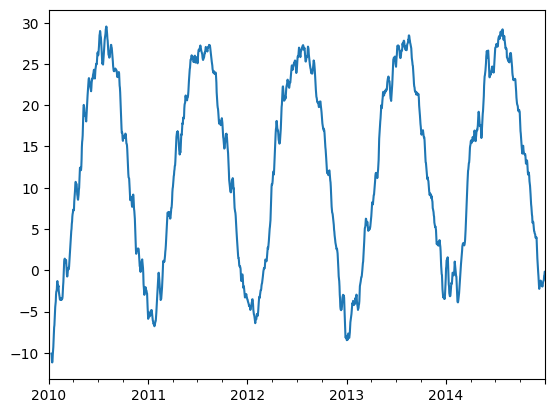

In [ ]:
#Re muestreo para sacar valores promedio por meses (dondtro de parentesis se da la aclaracion de dias, meses etc. mean es una estrategia junto a max y min)
ts.resample("D").mean()
#Se puede sacara una media movil para tener una media de cierto intervalo de tiempo, si saca Nan es pq no cae en el intervalo de los 10 dias
ts.resample("D").mean().rolling(window=10).mean().plot()

<Axes: >

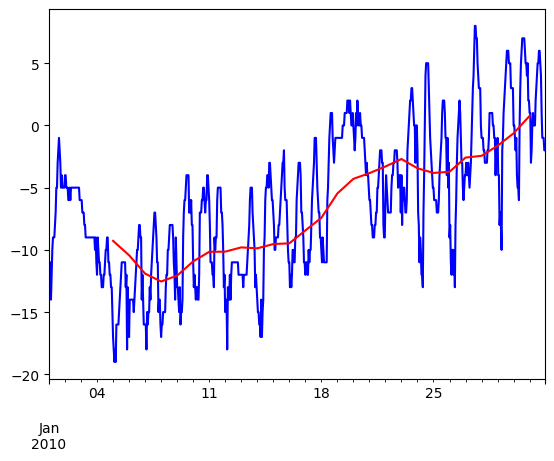

In [ ]:
#Grafica de enero
ts["2010-01"].plot(color='blue')
ts["2010-01"].resample("D").mean().rolling(window=5).mean().plot(color='red')

<Axes: >

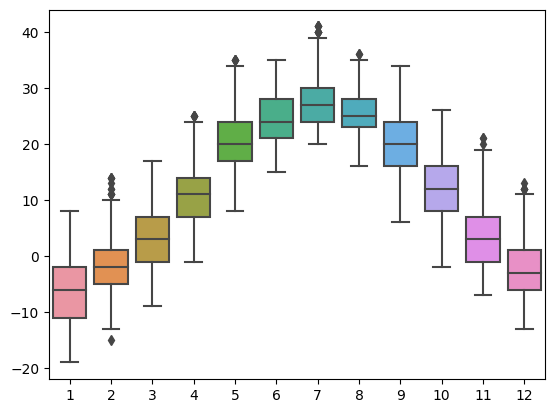

In [ ]:
sns.boxplot(x = ts["2010"].index.month, y=ts["2010"].values)

**Trabajo en clase:**

EXPLORACIÓN Y PREPROCESAMIENTO DE DATOS

In [ ]:
dfD = pd.read_csv('./USDCOP=X.csv', index_col=0)
dfE = pd.read_csv('./EURCOP=X.csv', index_col=0)

dfDII = pd.read_csv('./USDCOP=X.csv')
dfDII.rename(columns = {'Close':'Dolar'}, inplace = True)
dfEII = pd.read_csv('./EURCOP=X.csv')
dfEII.rename(columns = {'Close':'Euro'}, inplace = True)

tsD = dfD[['Close']]
tsE = dfE[['Close']]

tsD.index = pd.to_datetime(dfD.index)
tsE.index = pd.to_datetime(dfE.index)

Text(0.5, 1.0, 'Valor del dolar ultimo año')

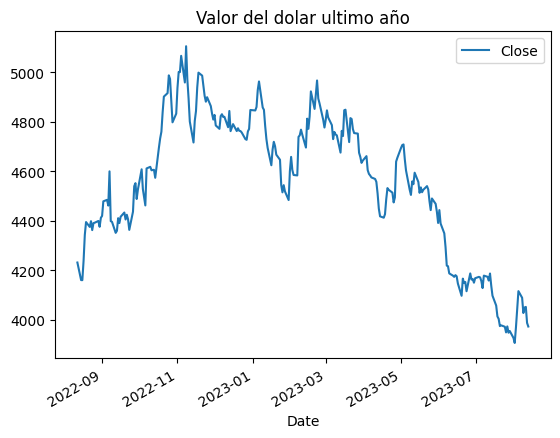

In [ ]:
#(PNT1 Y PNT2) Valor del dolar ultimo año y su grafica
tsD.plot()
plt.title('Valor del dolar ultimo año')

Text(0.5, 1.0, 'Media movil de 20 dias')

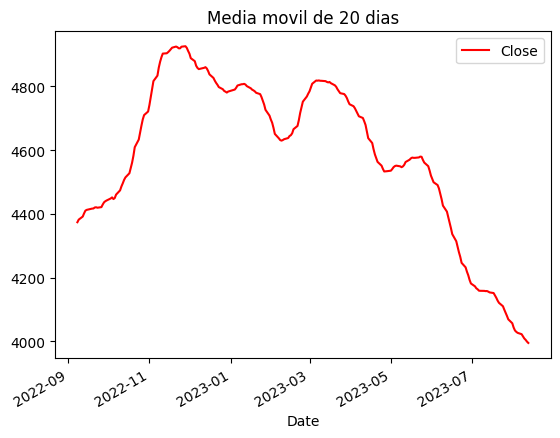

In [ ]:
#(PNT3) Media movil de 20 dias y su grafica
|
plt.title('Media movil de 20 dias')

Text(0.5, 1.0, 'Histograma con media y desviacion')

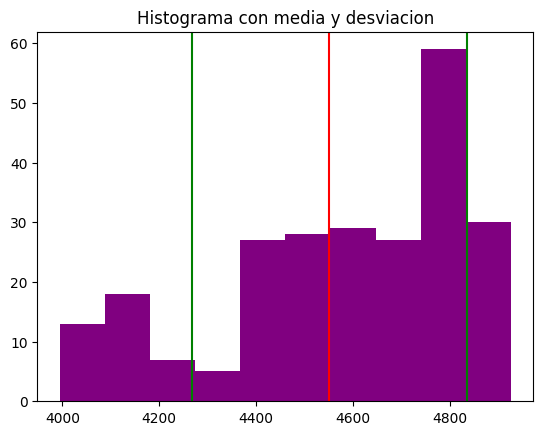

In [ ]:
#(PNT4) Histograma con media y desviacion
plt.hist(tsD.rolling(window=20).mean(),color='purple')
x = tsD['Close'].mean()
y = tsD['Close'].std()
plt.axvline(x, color='red')
plt.axvline(y+x, color='green')
plt.axvline(x-y, color='green')
plt.title('Histograma con media y desviacion')

Text(0.5, 1.0, 'Boxplot por mes')

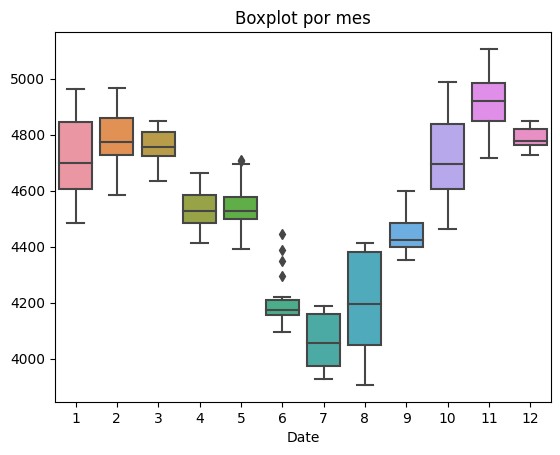

In [ ]:
#(PNT5) Boxplot por mes
sns.boxplot(x = tsD["Close"].index.month, y=tsD["Close"].values)
plt.title('Boxplot por mes')

<ipython-input-79-69f0909463bd>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  DyE = pd.concat([dfDII[{'Dolar','Date'}],dfEII[['Euro']]], axis = 1, join="inner")


Text(0.5, 1.0, 'Dolar y Euro vs tiempo')

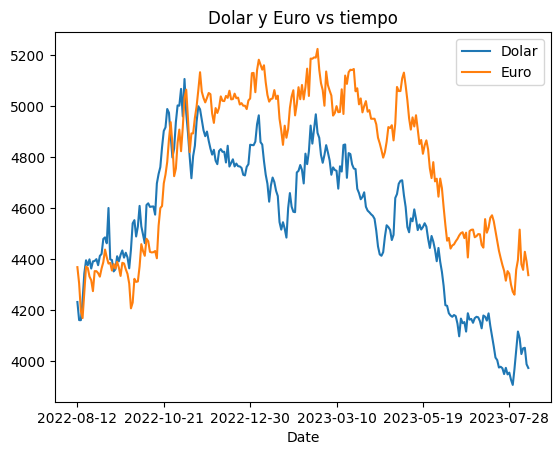

In [ ]:
#(PNT6) Dolar y Euro vs tiempo
DyE = pd.concat([dfDII[{'Dolar','Date'}],dfEII[['Euro']]], axis = 1, join="inner")
DyE = DyE.set_index(['Date'])
DyE.plot()
plt.title('Dolar y Euro vs tiempo')

In [ ]:
#(PNT7) Correlación precio dólar y euro. Pearson.
DyE.corr(method='pearson')

,Dolar,Euro
Dolar,1.000000,0.770906
Euro,0.770906,1.000000


Text(0, 0.5, 'Euro')

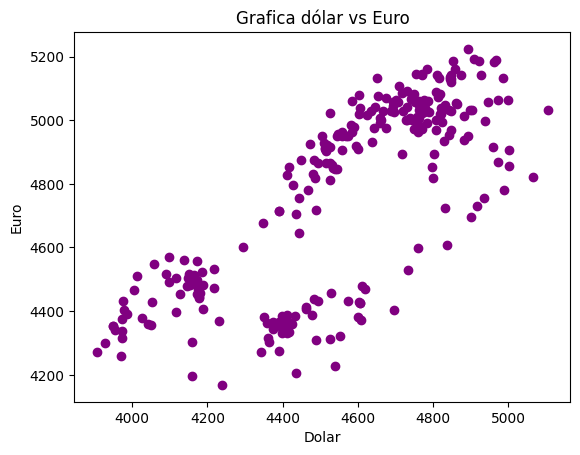

In [ ]:
#(PNT8) Graficar dólar vs Euro(scatter)
x = DyE['Dolar']
y = DyE['Euro']
plt.scatter(x,y,c='purple')
plt.title('Grafica dólar vs Euro')
plt.xlabel('Dolar')
plt.ylabel('Euro')